In [1]:
import pandas as pd

In [2]:
train=pd.read_csv("train.csv")
test_df=pd.read_csv("test_x.csv")
data=train.copy()

In [3]:
data.head()

,index,Cinsiyet,Yaş Grubu,Medeni Durum,Eğitim Düzeyi,İstihdam Durumu,Yıllık Ortalama Gelir,Yaşadığı Şehir,En Çok İlgilendiği Ürün Grubu,Yıllık Ortalama Satın Alım Miktarı,Yıllık Ortalama Sipariş Verilen Ürün Adedi,Eğitime Devam Etme Durumu,Öbek İsmi,Yıllık Ortalama Sepete Atılan Ürün Adedi
0,0,Kadın,31-40,Bekar,Yüksek Lisans Mezunu,Düzenli ve Ücretli Bir İşi Var,748266.440879,Büyük Şehir,Elektronik ve Teknolojik Ürünler,32010.900881,37.310644,Etmiyor,obek_4,102.936904
1,1,Erkek,>60,Evli,Lise Mezunu,Kendi İşinin Sahibi,246298.609605,Küçük Şehir,Spor Malzemeleri,4145.729891,11.554851,Etmiyor,obek_5,82.176053
2,2,Erkek,18-30,Bekar,Lise Mezunu,Düzenli ve Ücretli Bir İşi Var,268582.732360,Küçük Şehir,Giyim,9924.379414,55.353236,Ediyor,obek_8,141.661426
3,3,Erkek,51-60,Evli,Lise Mezunu,Kendi İşinin Sahibi,327721.837865,Kırsal,Giyim,6417.780714,15.417239,Etmiyor,obek_3,17.097397
4,4,Erkek,31-40,Evli,Ortaokul Mezunu,İşsiz veya Düzenli Bir İşi Yok,397431.626948,Büyük Şehir,Giyim,7886.663061,14.689837,Etmiyor,obek_3,20.470459


In [4]:
data.drop("index",axis=1,inplace=True)

In [5]:
#dönüştürelecek DataFrame adı -->data

columns_l = list(data.columns)
categorical_columns = []

object_to_category = False  # Önce döngüde herhangi bir değişiklik yapılmadığını varsayalım

for i in columns_l:
    if data[i].dtype == 'object' or data[i].dtype.name == 'category':
        categorical_columns.append(i)
        if data[i].dtype == 'object':
            object_to_category = True  # En az bir "object" tipinde sütun bulundu

# "object" tipindeki sütunları "category" tipine dönüştürme ve çevrilenleri yazdırma
for column in categorical_columns:
    if data[column].dtype == 'object':
        data[column] = data[column].astype('category')

# Eğer dönüştürme yapıldıysa, çevrilenleri yazdırma
if object_to_category:
    print("Kategorik değişkene çevrilenler:")
    for column in categorical_columns:
        if data[column].dtype == 'category':
            print(column)
else:
    print("Object tipinde kolon yok.")

Kategorik değişkene çevrilenler:
Cinsiyet
Yaş Grubu
Medeni Durum
Eğitim Düzeyi
İstihdam Durumu
Yaşadığı Şehir
En Çok İlgilendiği Ürün Grubu
Eğitime Devam Etme Durumu
Öbek İsmi


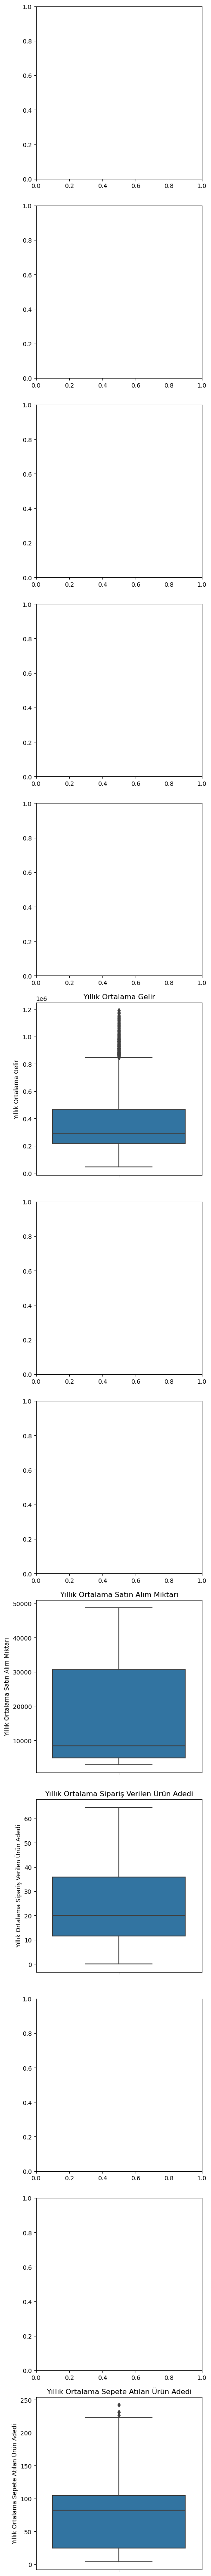

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.DataFrame(data)

# Ana grafik ve alt grafikler oluşturun
fig, axes = plt.subplots(nrows=len(df.columns), ncols=1, figsize=(5, 60))

# Her bir değişkenin alt alta boxplotunu çizin
for i, column in enumerate(df.columns):
    try:
        sns.boxplot(data=df, y=column, ax=axes[i])
        axes[i].set_title(column)
    except:
        pass
# Alt grafikler arasında boşluk bırakın
plt.tight_layout()

# Grafiği gösterin
plt.show()


#col = ['belly','chest','eye','taill','totlngth','skullw','hdlngth']

<Figure size 800x500 with 0 Axes>

<Figure size 800x500 with 0 Axes>

<Figure size 800x500 with 0 Axes>

<Figure size 800x500 with 0 Axes>

<Figure size 800x500 with 0 Axes>

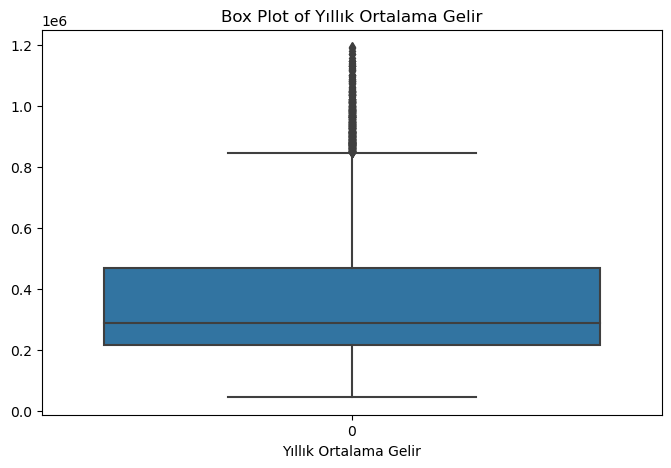

<Figure size 800x500 with 0 Axes>

<Figure size 800x500 with 0 Axes>

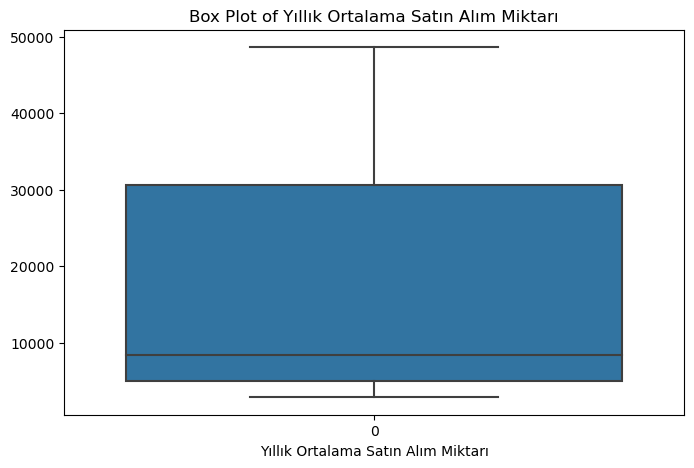

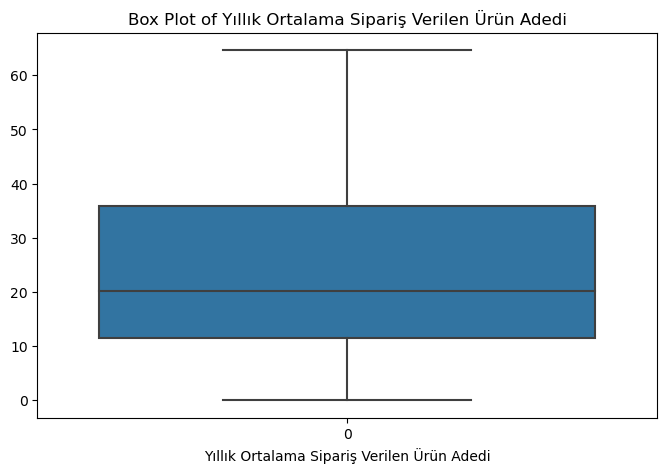

<Figure size 800x500 with 0 Axes>

<Figure size 800x500 with 0 Axes>

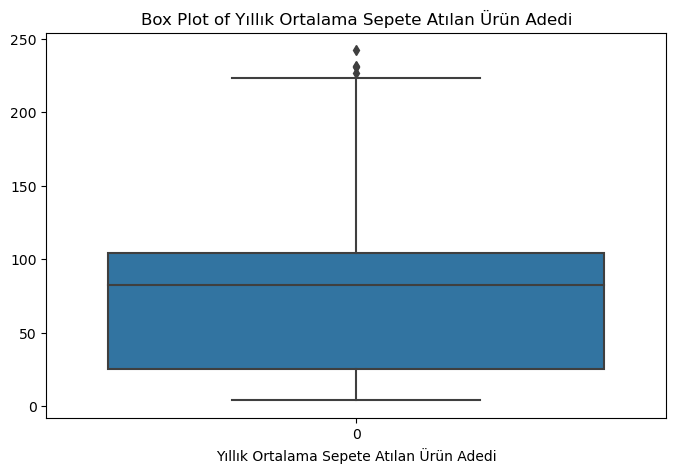

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



# Her bir sütun için aykırı değerleri görselleştirin
for column in data.columns:
    try:
        plt.figure(figsize=(8, 5))
        sns.boxplot(data=data[column])
        plt.title(f'Box Plot of {column}')
        plt.xlabel(column)
        plt.show()
    except:
        pass

In [8]:
#yıllık ortlama gelir
#yıllık ortlama sepete atılan ürün

In [9]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns


# Her bir sütun için Grubbs Testi uygulayarak aykırı değerleri belirleyin
for column in data.columns:
    try:
        values = data[column]

        # Grubbs Testi istatistiklerini hesaplayın
        mean_value = np.mean(values)
        std_dev = np.std(values)
        z_scores = np.abs((values - mean_value) / std_dev)
        max_z_score = np.max(z_scores)

        # Grubbs Testi istatistiksel olarak anlamlı bir aykırı değer bulunup bulunmadığını belirleyin
        p_value = 0.05  # Anlamlılık düzeyini belirleyin (örneğin, 0.05)
        critical_value = stats.t.ppf(1 - p_value / (2 * len(values)), len(values) - 2)
        critical_z_score = ((len(values) - 1) / np.sqrt(len(values))) * np.sqrt(critical_value**2 / (len(values) - 2 + critical_value**2))

        if max_z_score > critical_z_score:
            print(f"Aykırı değer tespit edildi: {column}")

            # Aykırı değeri belirleyin
            outlier_index = np.argmax(z_scores)
            outlier_value = values[outlier_index]

            print(f"Aykırı değer: {outlier_value}")

            # Aykırı değeri veri setinden çıkarın (opsiyonel)
            # data = data[data[column] != outlier_value]

            # Aykırı değeri görselleştirin
            plt.figure(figsize=(8, 5))
            sns.boxplot(data=data[column])
            plt.scatter(outlier_index, outlier_value, color='red', label='Aykırı Değer')
            plt.title(f'Box Plot of {column}')
            plt.xlabel(column)
            plt.legend()
            plt.show()
    except:
        pass

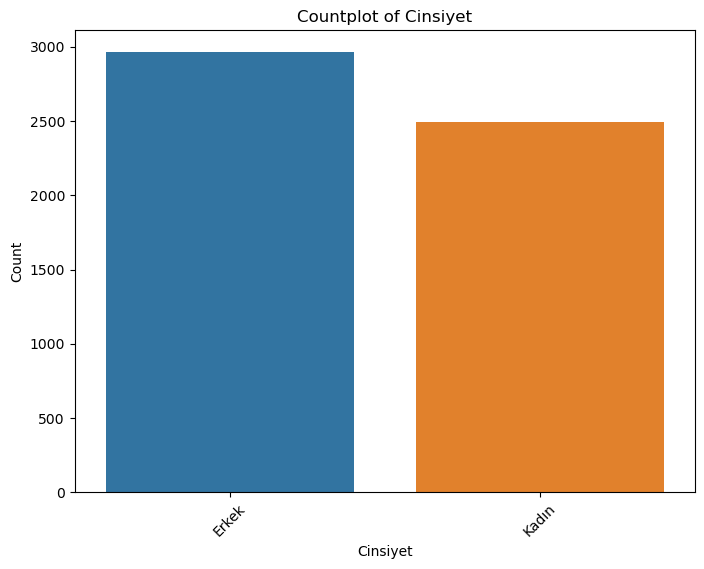

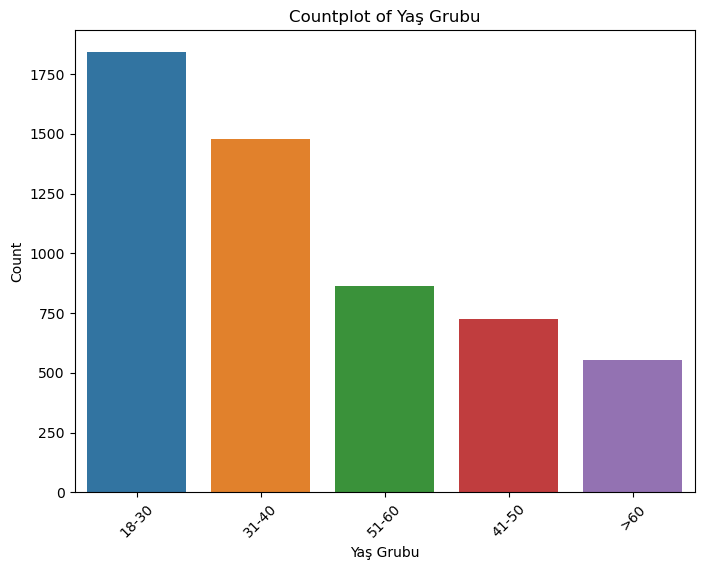

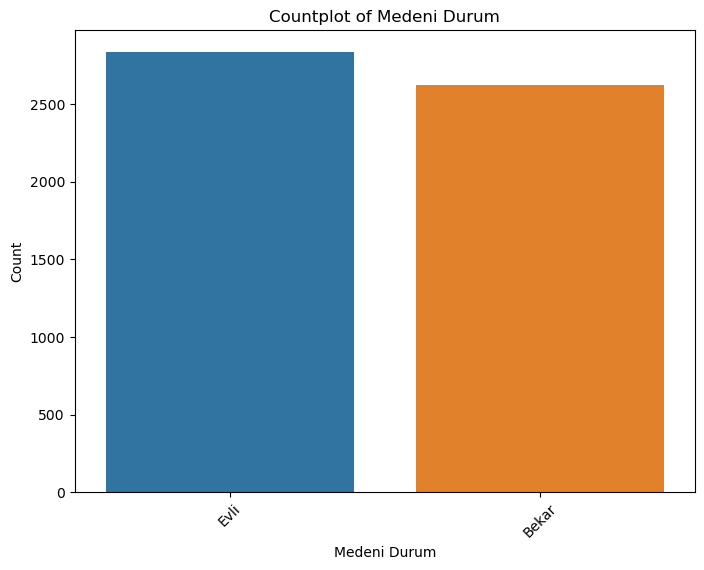

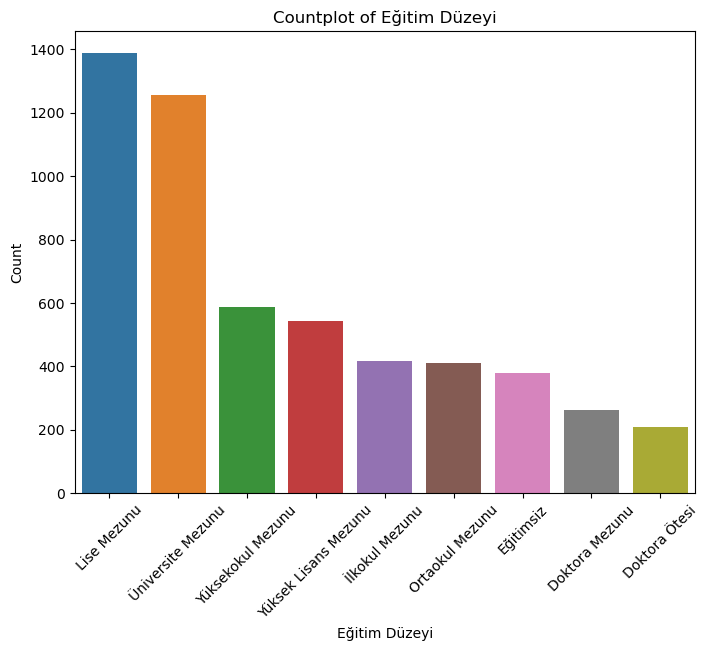

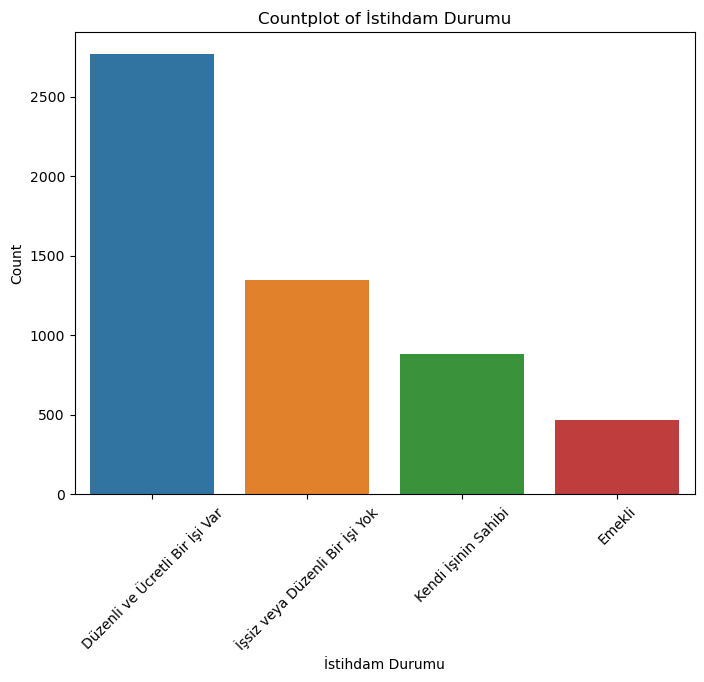

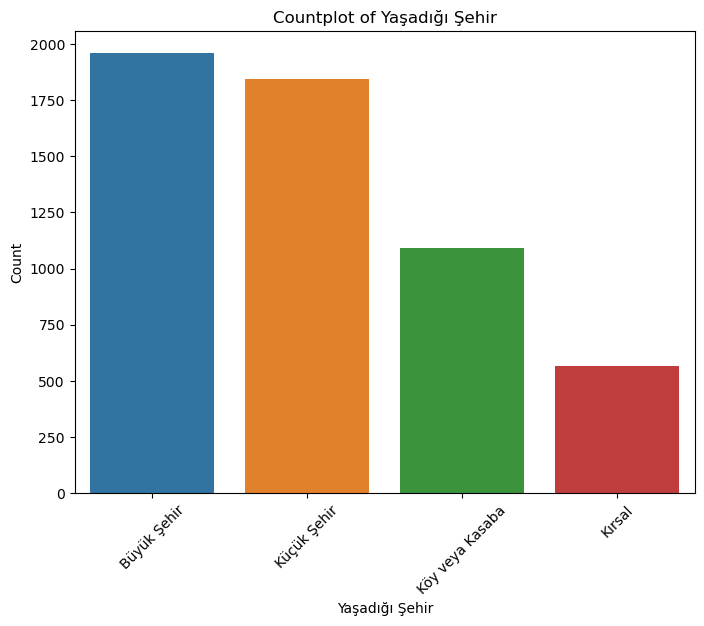

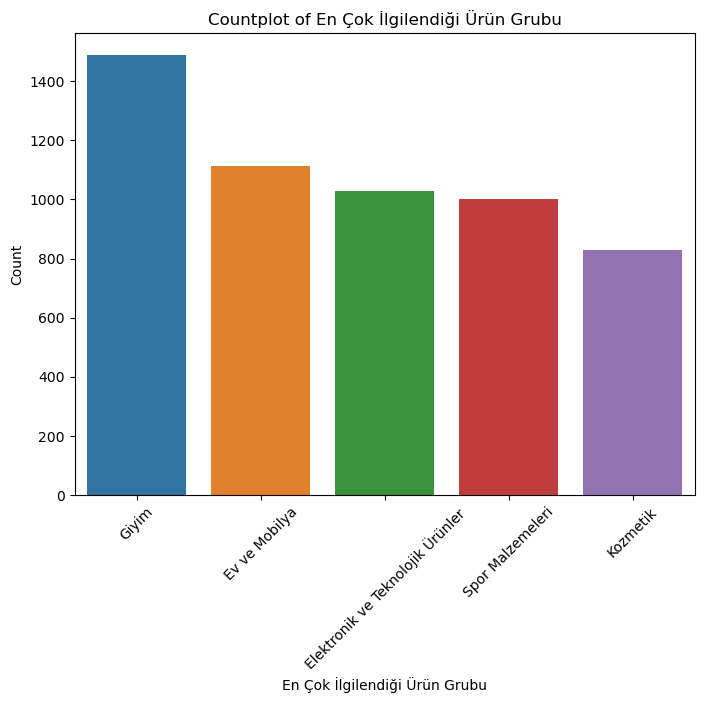

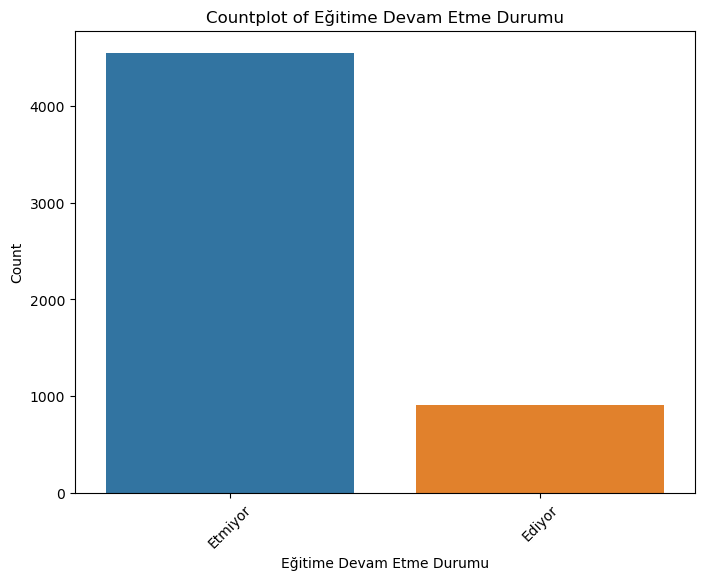

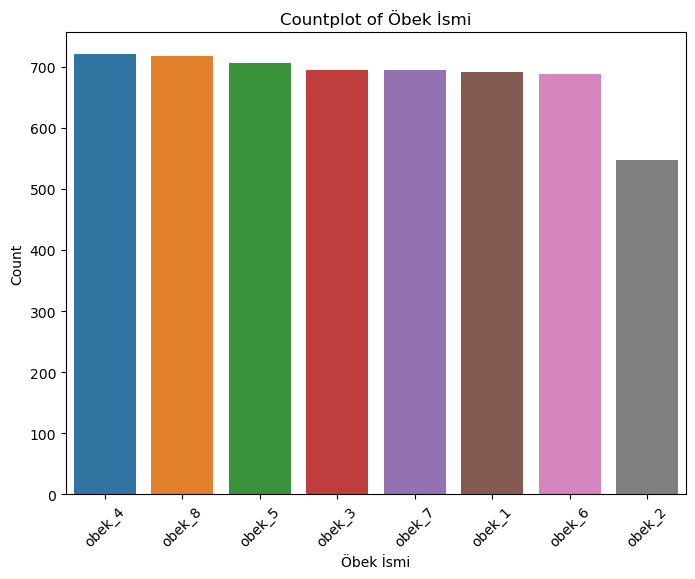

In [10]:

import matplotlib.pyplot as plt
import seaborn as sns



df = data

# DataFrame'deki her bir kategorik değişken için görselleştirme
for column in df.columns:
    if df[column].dtype == 'category':
        plt.figure(figsize=(8, 6))
        sns.countplot(data=df, x=column, order=df[column].value_counts().index)
        plt.title(f'Countplot of {column}')
        plt.xlabel(column)
        plt.ylabel('Count')
        plt.xticks(rotation=45)
        plt.show()


In [11]:
import pandas as pd
#girdi--> data

df = pd.DataFrame(data)

# Kategorik sütunlara dönüşüm ve (n-1) kuralı uygulama
categorical_columns = df.select_dtypes(include=["category"]).columns

for column in categorical_columns:
    dummies = pd.get_dummies(df[column], prefix=column, drop_first=True)
    df = pd.concat([df, dummies], axis=1)
    df.drop(column, axis=1, inplace=True)
    
data=df

In [12]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler


# Sadece int ve float türündeki değişkenleri seçelim
numeric_columns = data.select_dtypes(include=['int', 'float']).columns

# Seçilen değişkenleri normalizasyon için kullanalım
scaler = MinMaxScaler()
data[numeric_columns] = scaler.fit_transform(data[numeric_columns])




In [13]:
"""""
# Kllanacağımız kümeleme algoritmalarını tanımlayalım
cluster_algorithms = [
    ('KMeans', KMeans(n_clusters=2)),
    ('Agglomerative', AgglomerativeClustering(n_clusters=2)),
    ('DBSCAN', DBSCAN(eps=0.5, min_samples=2)),
    ('GaussianMixture', GaussianMixture(n_components=2))

"""""

'""\n# Kllanacağımız kümeleme algoritmalarını tanımlayalım\ncluster_algorithms = [\n    (\'KMeans\', KMeans(n_clusters=2)),\n    (\'Agglomerative\', AgglomerativeClustering(n_clusters=2)),\n    (\'DBSCAN\', DBSCAN(eps=0.5, min_samples=2)),\n    (\'GaussianMixture\', GaussianMixture(n_components=2))\n\n'

In [14]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters =7)
kmeans

KMeans(n_clusters=7)

In [15]:
k_fit=kmeans.fit(data)

C:\Users\Selman\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Selman\AppData\Roaming\Python\Python39\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\Selman\AppData\Roaming\Python\Python39\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


In [16]:
k_fit.n_clusters

7

In [17]:
k_fit.labels_

array([2, 6, 3, ..., 1, 3, 3])

In [18]:
!pip install yellowbrick

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 23.0.1 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


C:\Users\Selman\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Selman\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Selman\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Selman\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The defa

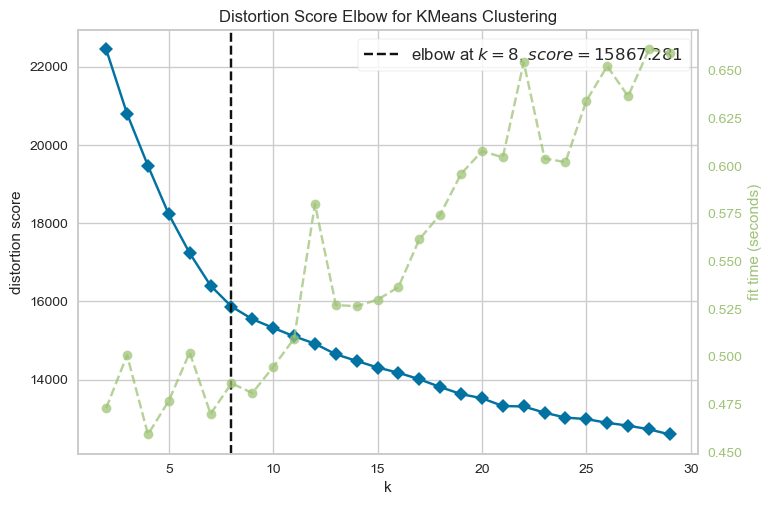

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [19]:
from yellowbrick.cluster import KElbowVisualizer
kmeans=KMeans()
visualizer=KElbowVisualizer(kmeans,k=(2,30))
visualizer.fit(data)
visualizer.poof()

In [20]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters =8)
kmeans

KMeans()

In [21]:
k_fit=kmeans.fit(data)

C:\Users\Selman\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [22]:
kumeler=k_fit.labels_

In [23]:
sunum1=pd.DataFrame({"kişiler": train.index,"Kumeler":kumeler})

In [ ]:
data.to_excel("sunum.xlsx")

In [ ]:
import joblib

In [ ]:
model_filename = 'kmeans_model_1.joblib'
joblib.dump(kmeans, model_filename)


In [ ]:
data.to_csv("sunum.csv")